In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns
import random
import matplotlib.patches as mpatches

In [31]:
df_frames = pd.read_csv("../data/fb_data_with_predictions-v2.csv", on_bad_lines='skip')

In [32]:
highlevel_unions = pd.read_csv("../data/mapping_fb_unions.csv")
highlevel_unions = highlevel_unions.dropna(subset=["account_match"])

In [33]:
df_frames["main_union"] = df_frames["surface.username"].map(highlevel_unions.set_index("account_match")["union"].to_dict())

## Sample and get average

In [34]:
df_frames["main_union"].value_counts().min()

779

In [35]:
len(df_frames[(df_frames["diagnostic"] == 0)&(df_frames["prognostic"] == 0)&(df_frames["motivational"] == 0)&(df_frames["community"] == 0)&(df_frames["engagement"] == 0)])

18039

In [36]:
df_frames["main_union"].value_counts().describe()

count       40.000000
mean      3937.950000
std       2540.434113
min        779.000000
25%       1920.500000
50%       3053.000000
75%       5441.750000
max      10452.000000
Name: count, dtype: float64

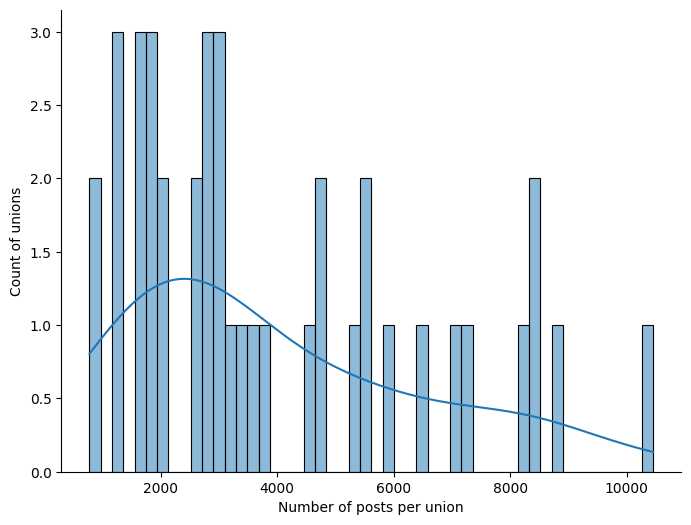

In [37]:
counts = df_frames["main_union"].value_counts()

plt.figure(figsize=(8,6))
sns.histplot(counts, bins=50, kde=True)
plt.xlabel("Number of posts per union")
plt.ylabel("Count of unions")
sns.despine()
plt.savefig("../plots/unions_post_counts_histogram.svg")

In [38]:
list_values = []
for i in range(5):
    # sample df_frames stratified by main_union
    random.seed(i)
    df_frames_sample = df_frames.groupby("main_union", group_keys=False).apply(lambda x: x.sample(min(len(x), df_frames["main_union"].value_counts().min())))
    df_frames_sample = df_frames_sample.reset_index(drop=True)

    overall_use_diagnostic_sample = df_frames_sample[df_frames_sample["diagnostic"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_prognostic_sample = df_frames_sample[df_frames_sample["prognostic"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_motivational_sample = df_frames_sample[df_frames_sample["motivational"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_community_sample = df_frames_sample[df_frames_sample["community"]==1.0].shape[0]/df_frames_sample.shape[0]
    overall_use_engagement_sample = df_frames_sample[df_frames_sample["engagement"]==1.0].shape[0]/df_frames_sample.shape[0]
    # overall_use_political_endorsement_sample = df_frames_sample[df_frames_sample["Political Endorsement"]==1.0].shape[0]/df_frames_sample.shape[0]

    list_values.append([overall_use_diagnostic_sample, overall_use_prognostic_sample, overall_use_motivational_sample, overall_use_community_sample, overall_use_engagement_sample])

df_frames_sample = pd.DataFrame(list_values, columns=["overall_use_diagnostic", "overall_use_prognostic", "overall_use_motivational", "overall_use_community", "overall_use_engagement"])


In [39]:
mean_overall_usage = df_frames_sample.median()
mean_overall_usage

overall_use_diagnostic      0.407125
overall_use_prognostic      0.281643
overall_use_motivational    0.153626
overall_use_community       0.395988
overall_use_engagement      0.231451
dtype: float64

In [40]:
list_use_frames = []
for union in df_frames["main_union"].unique():
    df_union = df_frames[df_frames["main_union"] == union].copy()

    if df_union.shape[0] == 0:
        continue

    df_union_use_diagnostic = df_union[df_union["diagnostic"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_prognostic = df_union[df_union["prognostic"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_motivational = df_union[df_union["motivational"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_community = df_union[df_union["community"]==1.0].shape[0]/df_union.shape[0]
    df_union_use_engagement = df_union[df_union["engagement"]==1.0].shape[0]/df_union.shape[0]
    # df_union_use_political_endorsement = df_union[df_union["Political Endorsement"]==1.0].shape[0]/df_union.shape[0]

    list_use_frames.append([union, df_union_use_diagnostic, df_union_use_prognostic, df_union_use_motivational, df_union_use_community, df_union_use_engagement])
df_use_frames = pd.DataFrame(list_use_frames, columns=["main_union", "use_diagnostic", "use_prognostic", "use_motivational", "use_community", "use_engagement"])



In [41]:
df_use_frames["use_diagnostic_norm"] = (df_use_frames["use_diagnostic"] - mean_overall_usage["overall_use_diagnostic"])/mean_overall_usage["overall_use_diagnostic"]
df_use_frames["use_prognostic_norm"] = (df_use_frames["use_prognostic"] - mean_overall_usage["overall_use_prognostic"])/mean_overall_usage["overall_use_prognostic"]
df_use_frames["use_motivational_norm"] = (df_use_frames["use_motivational"] - mean_overall_usage["overall_use_motivational"])/mean_overall_usage["overall_use_motivational"]
df_use_frames["use_community_norm"] = (df_use_frames["use_community"] - mean_overall_usage["overall_use_community"])/mean_overall_usage["overall_use_community"]
df_use_frames["use_engagement_norm"] = (df_use_frames["use_engagement"] - mean_overall_usage["overall_use_engagement"])/mean_overall_usage["overall_use_engagement"]
# df_use_frames["use_political_endorsement_norm"] = (df_use_frames["use_political_endorsement"] - mean_overall_usage["overall_use_political_endorsement"])/mean_overall_usage["overall_use_political_endorsement"]


In [42]:
df_use_frames_work = df_use_frames.copy()
df_use_frames_work.drop(columns=["use_diagnostic", "use_prognostic", "use_motivational", "use_community", "use_engagement"], inplace=True)

In [43]:
df_use_frames_work[["use_diagnostic_norm", "use_prognostic_norm", "use_motivational_norm", "use_community_norm", "use_engagement_norm"]] = df_use_frames_work[["use_diagnostic_norm", "use_prognostic_norm", "use_motivational_norm", "use_community_norm", "use_engagement_norm"]].apply(lambda x: x*100)

In [44]:
df_use_frames_work["main_union"] = df_use_frames_work["main_union"].replace("roofers and waterproofers", "roofers")

In [45]:
union_dict_complete = {
'afscme': ['Public Sector', 'Industrial'],
'afge': ['Public Sector', 'Industrial'],
'csea': ['Public Sector', 'Industrial'],
'iaff': ['Public Sector', 'Craft'],
'aft': ['Education', 'Industrial'],
'nea': ['Education', 'Industrial'],
'nnu': ['Health Care', 'Industrial'],
'seiu': ['Health Care', 'Industrial'],
'ibew': ['Building Trades / Construction', 'Craft'],
'iupat': ['Building Trades / Construction', 'Craft'],
'ironworkers': ['Building Trades / Construction', 'Craft'],
'bac': ['Building Trades / Construction', 'Craft'],
'ua': ['Building Trades / Construction', 'Craft'],
'roofers': ['Building Trades / Construction', 'Craft'],
'liuna': ['Building Trades / Construction', 'Craft'],
'smart': ['Building Trades / Construction', 'Craft'],
'ibb': ['Building Trades / Construction', 'Craft'],
'natca': ['Transportation', 'Craft'],
'twu': ['Transportation', 'Industrial'],
'atu': ['Transportation', 'Industrial'],
'siu': ['Transportation', 'Industrial'],
'meba': ['Transportation', 'Craft'],
'uaw': ['Manufacturing & Industrial', 'Industrial'],
'usw': ['Manufacturing & Industrial', 'Industrial'],
'iam': ['Manufacturing & Industrial', 'Industrial'],
'umwa': ['Manufacturing & Industrial', 'Industrial'],
'bctgm': ['Manufacturing & Industrial', 'Industrial'],
'uwua': ['Manufacturing & Industrial', 'Industrial'],
'rwdsu': ['Service, Retail & Hospitality', 'Industrial'],
'ufcw': ['Service, Retail & Hospitality', 'Industrial'],
'unite here': ['Service, Retail & Hospitality', 'Industrial'],
'iatse': ['Entertainment & Media', 'Craft'],
'sag-aftra': ['Entertainment & Media', 'Craft'],
'afm': ['Entertainment & Media', 'Craft'],
'wgae': ['Entertainment & Media', 'Craft'],
'cwa': ['Entertainment & Media', 'Industrial'],
'opeiu': ['Entertainment & Media', 'Industrial'],
'ifpte': ['Other', 'Industrial'],
'apwu': ['Other', 'Industrial'],
'ibt': ['Other', 'Industrial']
}

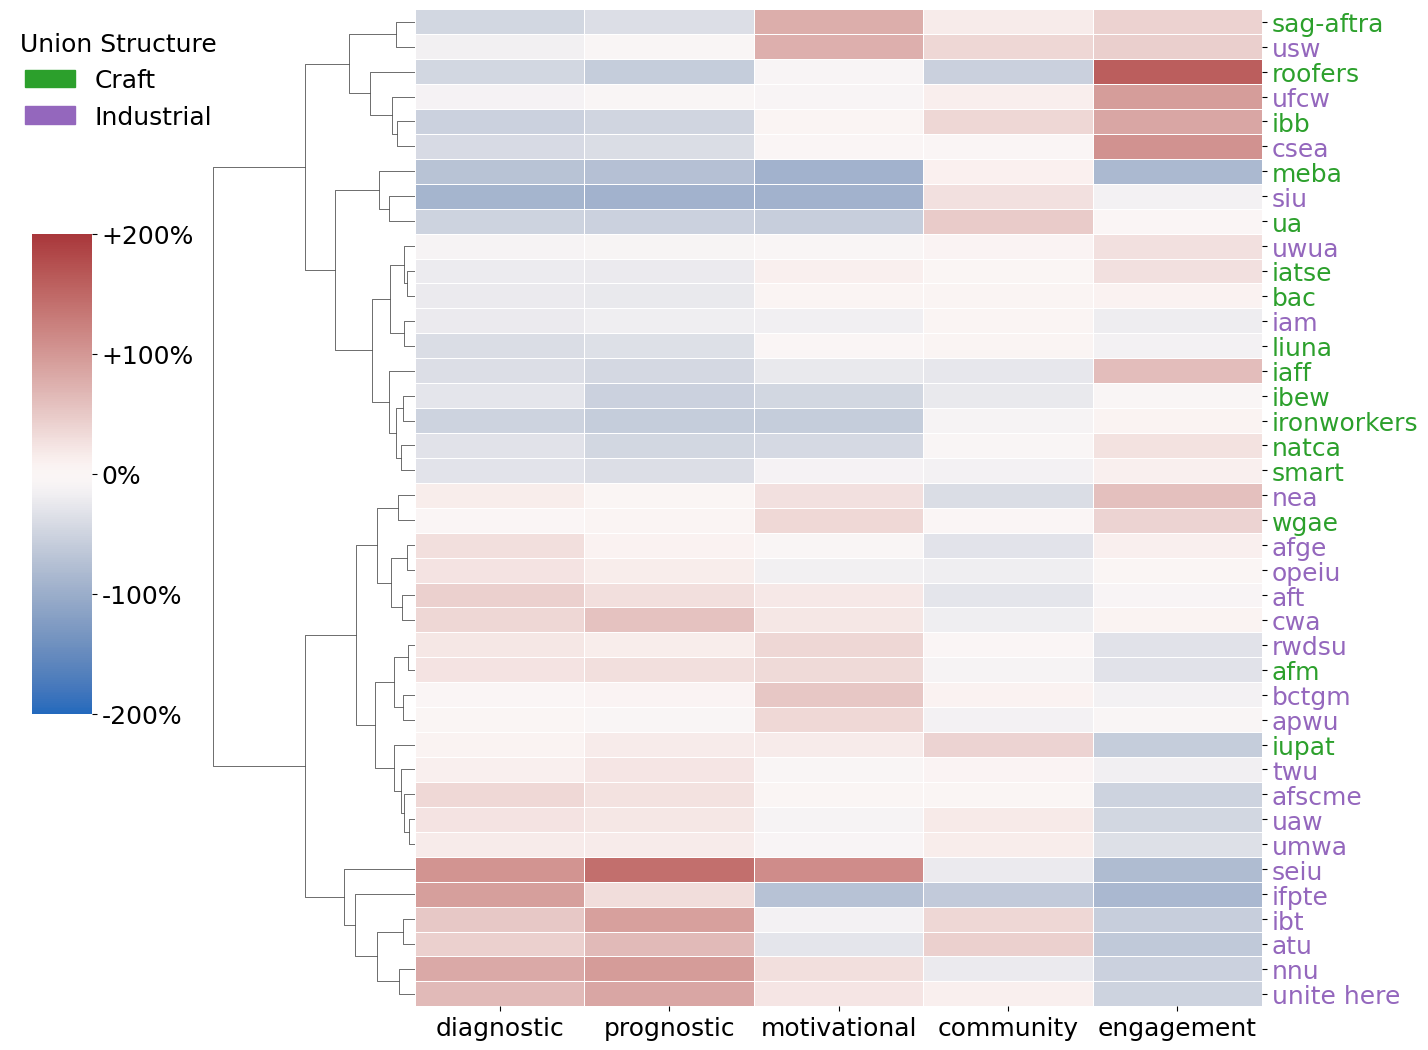

In [46]:
# define colors for each sector
sector_colors = {
    "Public Sector": "darkgreen",
    "Education": "blue",
    "Health Care": "red",
    "Building Trades / Construction": "saddlebrown",
    "Transportation": "purple",
    "Manufacturing & Industrial": "orange",
    "Service, Retail & Hospitality": "teal",
    "Entertainment & Media": "magenta",
    "Other": "grey"
}

binary_sector_colors = {
    "Craft": "#2ca02c",      
    "Industrial": "#9467bd" 
}

# clustered heatmap
g = sns.clustermap(
    df_use_frames_work.set_index("main_union"),
    cmap="vlag",
    linewidths=0.5,
    center=0,
    vmin=-200,
    vmax=200,
    method="ward",
    metric="euclidean",
    figsize=(12, 12),
    col_cluster=False,
    cbar_pos=(-0.13, .4, .05, .4),
    dendrogram_ratio=(0.2, 0),  # reduce top dendrogram height
)

# get the colorbar and relabel ticks
colorbar = g.ax_heatmap.collections[0].colorbar
colorbar.set_ticks([-200, -100, 0, 100, 200])
colorbar.set_ticklabels(["-200%", "-100%", "0%", "+100%", "+200%"])
colorbar.ax.tick_params(labelsize=18)

# change x-tick labels
g.ax_heatmap.set_xticklabels(
    ["diagnostic", "prognostic", "motivational", "community", "engagement"],
    rotation=0,
    fontsize=18,
)

# adjust y-tick labels and color them
for label in g.ax_heatmap.get_yticklabels():
    union = label.get_text()
    sector_binary = union_dict_complete.get(union, [None, None])[1]
    sector = union_dict_complete.get(union, [None, None])[0]
    if sector_binary is not None:
        label.set_color(binary_sector_colors[sector_binary])
    label.set_fontsize(18)
    label.set_rotation(0)

# remove axis labels
g.ax_heatmap.set_xlabel("")
g.ax_heatmap.set_ylabel("")

# --- add legend ---
handles = [
    mpatches.Patch(color=color, label=sector)
    for sector, color in binary_sector_colors.items()
]

g.ax_heatmap.legend(
    handles=[mpatches.Patch(color=c, label=l) for l, c in binary_sector_colors.items()],
    title="Union Structure",
    loc='upper center',
    bbox_to_anchor=(-0.35, 1),
    ncol=1,
    frameon=False,
    fontsize=18,
    title_fontsize=18
)

plt.savefig("../plots/frames_by-union_clustered.svg", bbox_inches="tight")
